In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Data Loading

In [17]:
df = pd.read_excel("data.xlsx")

# 2. Data Exploring

In [18]:
df

,Date/Time,Constraint DA,Constraint RT,Wind,Solar,AEP Load,ATSI Load,COMED Load,DOM Load
0,2021-07-01 01:00:00,0.0,0.0,753.281,0.0,14236,7455,11651,14123
1,2021-07-01 02:00:00,0.0,0.0,738.755,0.0,13636,7091,10871,13345
2,2021-07-01 03:00:00,0.0,0.0,724.276,0.0,13171,6850,10313,12765
3,2021-07-01 04:00:00,0.0,0.0,752.041,0.0,12962,6714,9925,12393
4,2021-07-01 05:00:00,0.0,0.0,759.611,0.0,13060,6730,9731,12293
...,...,...,...,...,...,...,...,...,...
4412,2021-12-31 20:00:00,0.0,0.0,3327.337,0.0,13549,7346,10776,11545
4413,2021-12-31 21:00:00,0.0,0.0,3330.132,0.0,13294,7164,10616,11251
4414,2021-12-31 22:00:00,0.0,0.0,3343.444,0.0,12985,6948,10420,10863
4415,2021-12-31 23:00:00,0.0,0.0,3418.329,0.0,12579,6669,10155,10329


In [19]:
df.describe()

,Constraint DA,Constraint RT,Wind,Solar,AEP Load,ATSI Load,COMED Load,DOM Load
count,4417.000000,4417.000000,4412.000000,4416.000000,4417.000000,4417.000000,4417.000000,4417.000000
mean,-38.573711,-49.394247,2756.335277,753.355388,14565.183835,7671.254471,11293.011320,12668.480190
std,115.701292,216.464412,2009.315364,963.191161,2355.529217,1380.445211,2476.481713,2492.093186
min,-1737.120000,-1920.610000,119.755000,0.000000,9200.000000,5201.000000,7346.000000,8425.000000
25%,0.000000,0.000000,1123.712000,0.000000,12930.000000,6668.000000,9492.000000,10914.000000
50%,0.000000,0.000000,2218.451000,23.548500,14203.000000,7443.000000,10762.000000,12135.000000
75%,0.000000,0.000000,4057.609750,1558.333250,15947.000000,8345.000000,12353.000000,14010.000000
max,0.000000,0.000000,9110.341000,3138.696000,22122.000000,12796.000000,20388.000000,20213.000000


In [20]:
df.corr()

C:\Users\William Hazen\AppData\Local\Temp\ipykernel_3792\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Constraint DA,Constraint RT,Wind,Solar,AEP Load,ATSI Load,COMED Load,DOM Load
Constraint DA,1.000000,0.637922,-0.432987,0.074783,0.036635,0.086964,0.168833,0.049648
Constraint RT,0.637922,1.000000,-0.304830,0.077619,0.063697,0.098315,0.151440,0.058328
Wind,-0.432987,-0.304830,1.000000,-0.184298,-0.217082,-0.246319,-0.302287,-0.263979
Solar,0.074783,0.077619,-0.184298,1.000000,0.416378,0.441098,0.380559,0.361686
AEP Load,0.036635,0.063697,-0.217082,0.416378,1.000000,0.964686,0.883311,0.924463
ATSI Load,0.086964,0.098315,-0.246319,0.441098,0.964686,1.000000,0.920547,0.892447
COMED Load,0.168833,0.151440,-0.302287,0.380559,0.883311,0.920547,1.000000,0.834079
DOM Load,0.049648,0.058328,-0.263979,0.361686,0.924463,0.892447,0.834079,1.000000


C:\Users\William Hazen\AppData\Local\Temp\ipykernel_3792\466591448.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


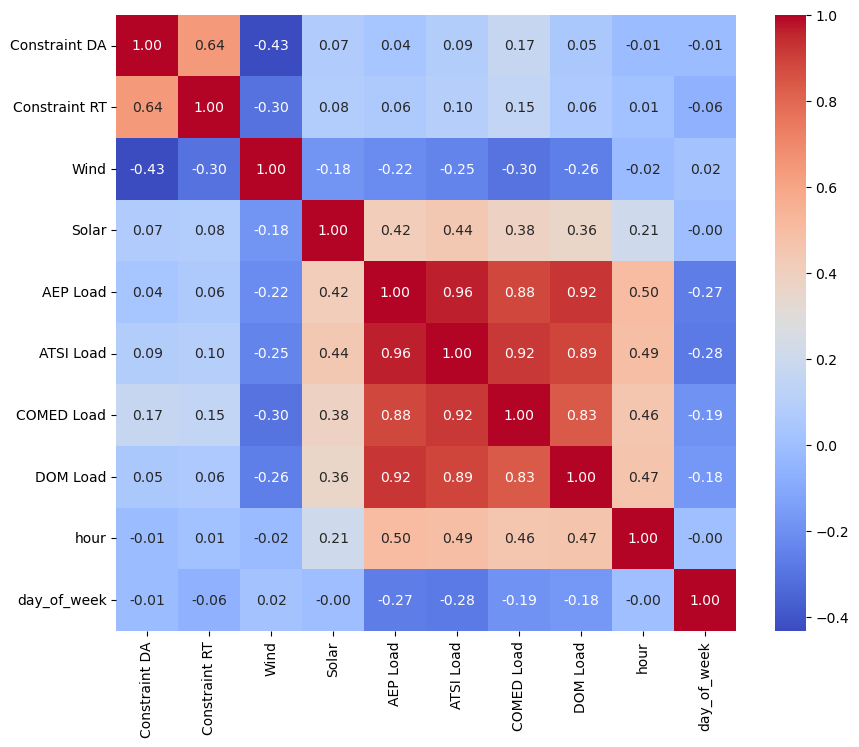

In [28]:
# Create a correlation heatmap for all numerical features
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [21]:
DA = df["Constraint DA"]
RT = df["Constraint RT"]

Wind = df["Wind"]
Solar = df["Solar"]
AEP_load = df["AEP Load"]
ATSI_load = df["ATSI Load"]
COMED_load = df["COMED Load"]
DOM_load = df["DOM Load"]



In [22]:
df[df["Constraint DA"] != 0]


,Date/Time,Constraint DA,Constraint RT,Wind,Solar,AEP Load,ATSI Load,COMED Load,DOM Load
1643,2021-09-07 12:00:00,-178.40,0.0,5057.239,3038.172,16050,8743,13197,14256
1644,2021-09-07 13:00:00,-198.20,0.0,5665.637,3054.209,16792,9176,14067,15154
1645,2021-09-07 14:00:00,-212.45,0.0,6033.085,2991.241,17444,9636,14662,15952
1646,2021-09-07 15:00:00,-170.96,0.0,6187.979,2861.680,18099,9852,15154,16646
1647,2021-09-07 16:00:00,-154.36,0.0,6132.287,2668.678,18489,9973,15091,17161
...,...,...,...,...,...,...,...,...,...
3698,2021-12-02 02:00:00,-63.88,0.0,7948.839,0.000,12935,6576,8975,10076
3699,2021-12-02 03:00:00,-75.70,0.0,8003.681,0.000,12841,6502,8757,10031
3700,2021-12-02 04:00:00,-56.48,0.0,7956.965,0.000,12879,6470,8627,10102
3701,2021-12-02 05:00:00,-8.81,0.0,7799.071,0.000,13124,6563,8621,10415


In [23]:
df[df["Constraint RT"] != 0]


,Date/Time,Constraint DA,Constraint RT,Wind,Solar,AEP Load,ATSI Load,COMED Load,DOM Load
1990,2021-09-21 23:00:00,0.00,-68.02,3693.239,0.000,13799,7595,11037,12248
1991,2021-09-22 00:00:00,-24.53,-184.80,3932.346,0.000,12838,7084,10313,11296
1992,2021-09-22 01:00:00,-23.77,-576.28,4429.179,0.000,12466,6787,9510,10878
1993,2021-09-22 02:00:00,-29.03,-290.61,4787.550,0.000,11973,6511,9051,10434
1994,2021-09-22 03:00:00,-35.73,-471.98,5100.715,0.000,11683,6342,8754,10191
...,...,...,...,...,...,...,...,...,...
3653,2021-11-30 05:00:00,-405.57,-1006.40,4467.519,0.000,14648,7019,9111,13465
3654,2021-11-30 06:00:00,-426.15,-468.55,4119.262,0.000,15435,7345,9361,14178
3655,2021-11-30 07:00:00,-540.13,-1093.17,3764.448,0.966,16619,7917,9977,15245
3656,2021-11-30 08:00:00,-431.72,-414.47,3304.972,304.146,17217,8349,10915,15644


In [24]:
df.groupby(["Constraint RT", "Constraint DA"]).size()


Constraint RT  Constraint DA
-1920.61       -1103.84            1
-1899.67        0.00               1
-1892.64       -343.99             1
-1892.13       -721.28             1
-1875.76       -133.74             1
                                ... 
 0.00          -4.01               1
               -3.97               1
               -1.04               1
               -0.77               1
                0.00            3491
Length: 922, dtype: int64

In [25]:
df.groupby([df["Constraint RT"], df["Constraint DA"]]).size()

Constraint RT  Constraint DA
-1920.61       -1103.84            1
-1899.67        0.00               1
-1892.64       -343.99             1
-1892.13       -721.28             1
-1875.76       -133.74             1
                                ... 
 0.00          -4.01               1
               -3.97               1
               -1.04               1
               -0.77               1
                0.00            3491
Length: 922, dtype: int64

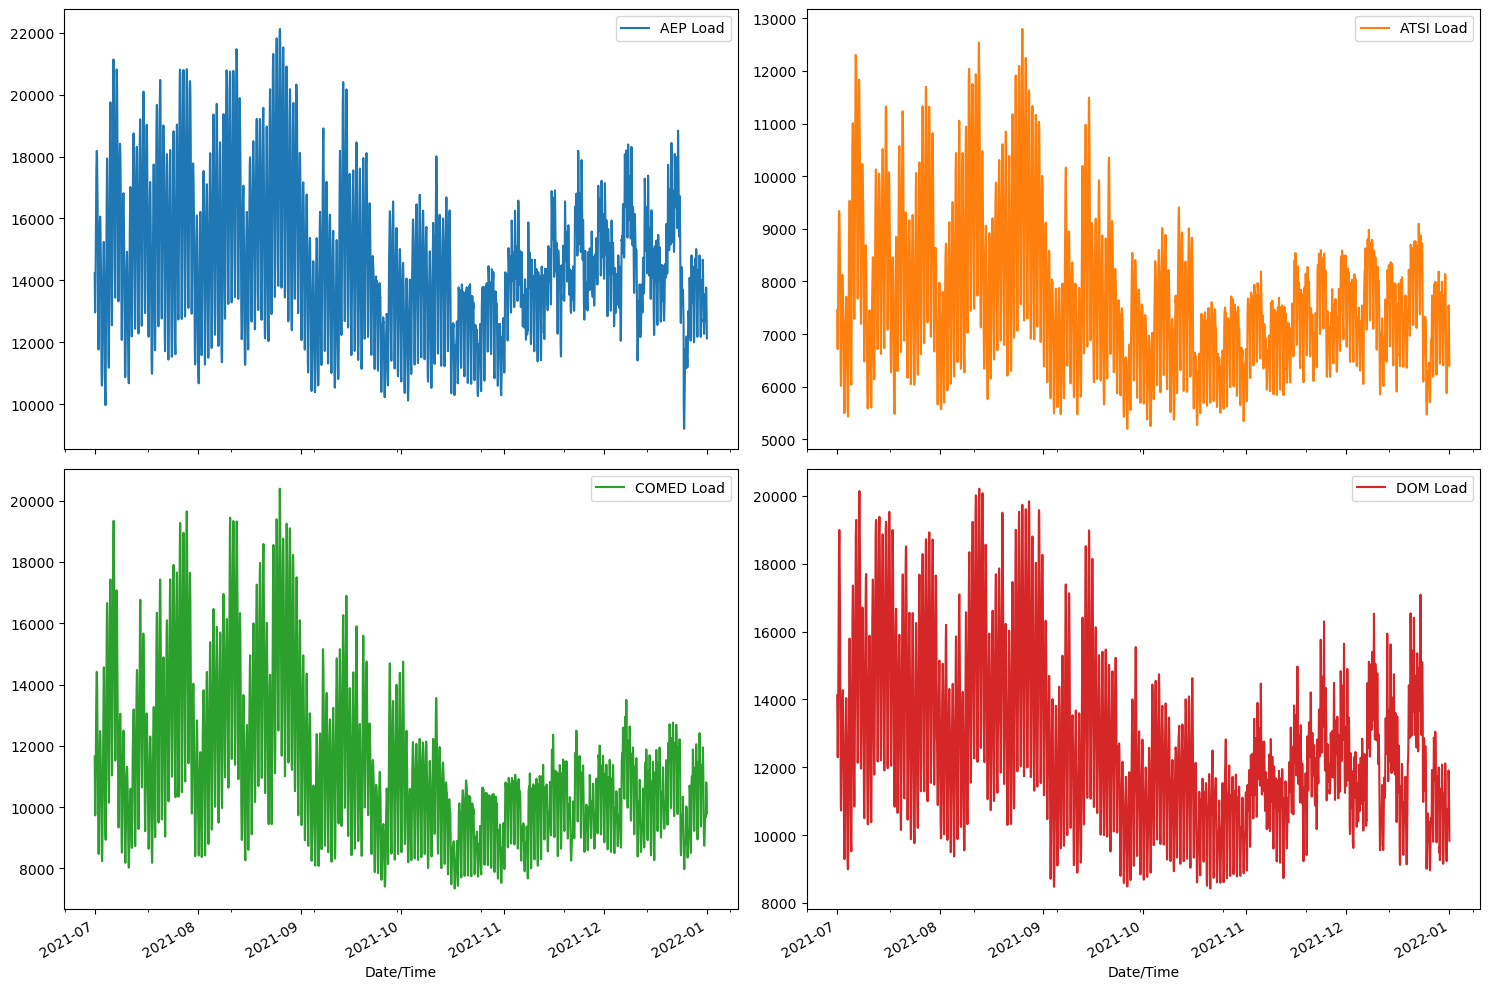

In [30]:
# Convert 'Date/Time' to datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

load_cols = ['AEP Load', 'ATSI Load', 'COMED Load', 'DOM Load']
df.set_index('Date/Time')[load_cols].plot(subplots=True,
                                          layout=(-1, 2), figsize=(15, 10))
plt.tight_layout()
plt.show()

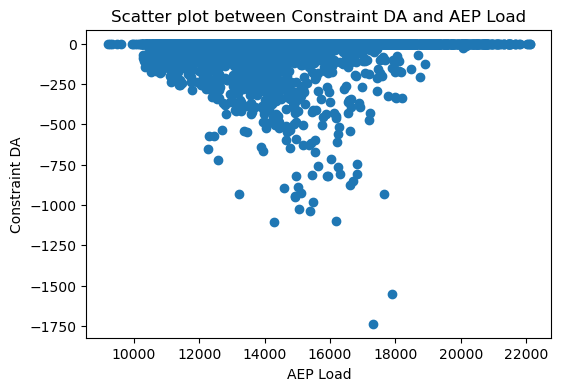

In [31]:
# Create a scatter plot for 'Constraint DA' and 'AEP Load'
plt.figure(figsize=(6, 4))
plt.scatter(df['AEP Load'], df['Constraint DA'])
plt.xlabel('AEP Load')
plt.ylabel('Constraint DA')
plt.title('Scatter plot between Constraint DA and AEP Load')
plt.show()

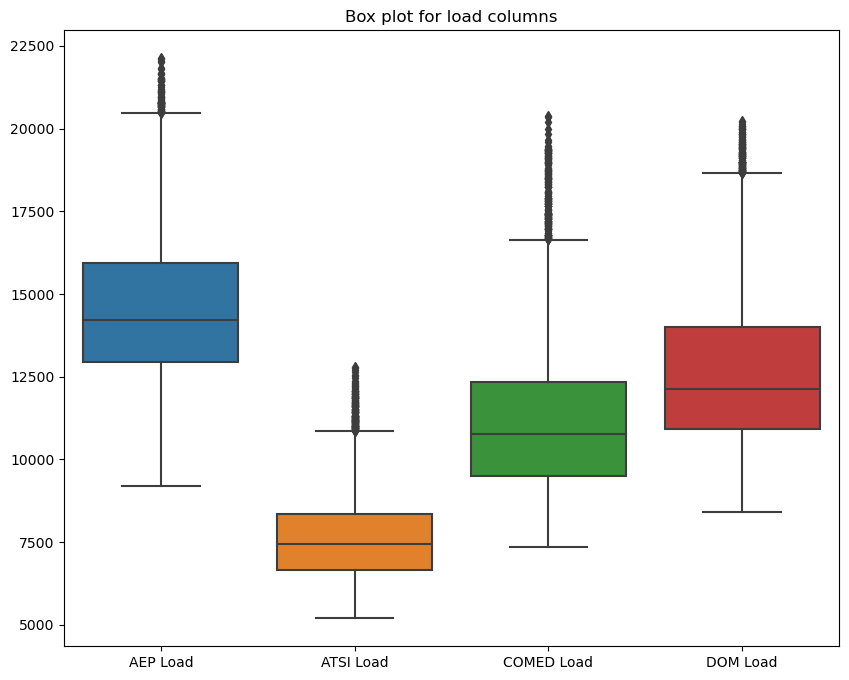

In [32]:
# Boxplot for load columns
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[load_cols])
plt.title('Box plot for load columns')
plt.show()

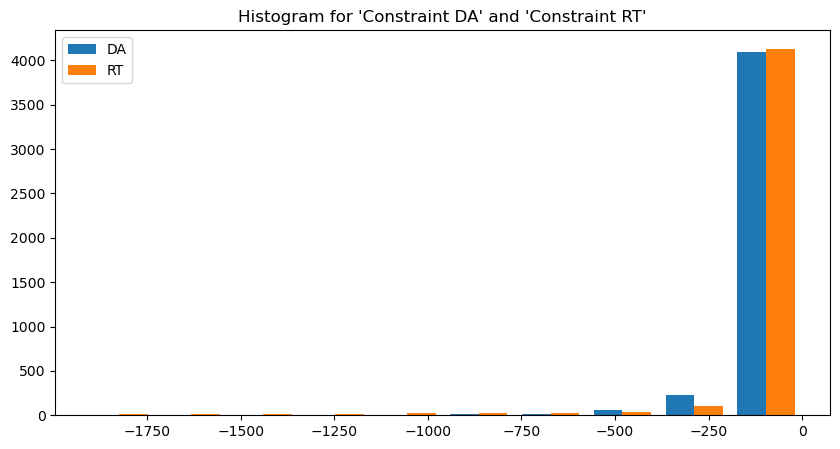

In [43]:
# Histogram for 'Constraint DA' and 'Constraint RT'
plt.figure(figsize=(10, 5))
plt.hist(df[['Constraint DA', 'Constraint RT']])
plt.legend(["DA", "RT"])
plt.title("Histogram for 'Constraint DA' and 'Constraint RT'")
plt.show()


# 3. Model Building

In [55]:
# Feature Engineering
df['hour'] = df['Date/Time'].dt.hour
df['day_of_week'] = df['Date/Time'].dt.dayofweek
# add other features...

# Model Selection
X = df[['Wind', 'Solar', 'AEP Load', 'ATSI Load', 'COMED Load',
        'DOM Load', 'hour', 'day_of_week']]  # predictors
y_DA = df['Constraint DA']  # target
y_RT = df['Constraint RT']  # target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_DA, test_size=0.2, random_state=42)


In [54]:


# # Train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))


In [50]:
from sklearn.impute import SimpleImputer

# Use a median imputer
imputer = SimpleImputer(strategy='mean')

# Train the imputer (this computes the median for each column)
imputer.fit(X_train)

# Transform the data (this replaces missing values with the medians)
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Continue with the model training...
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Evaluate the model
y_pred = model.predict(X_test_imputed)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))



RMSE:  90.82375535352382


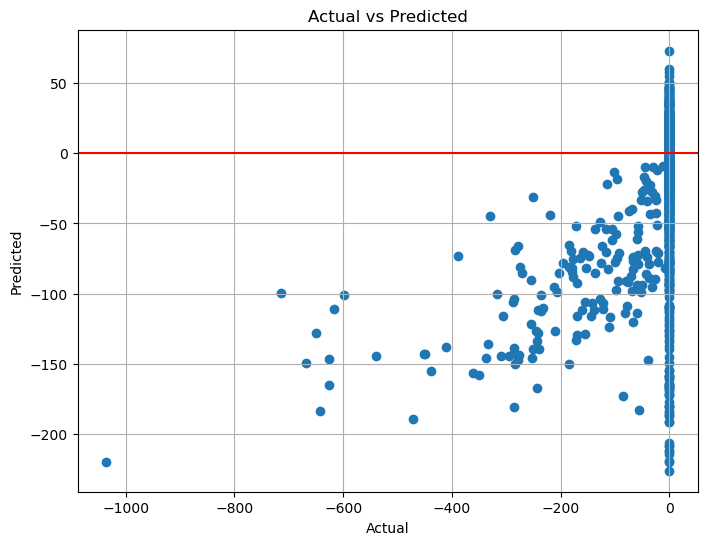

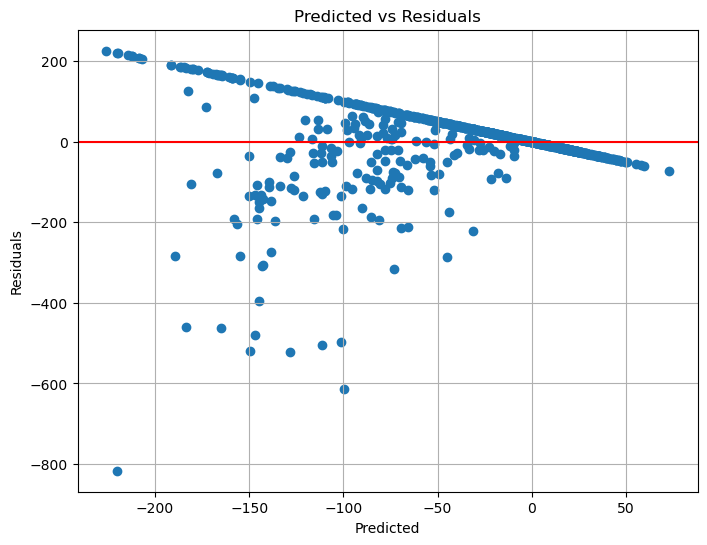

In [53]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.grid(True)
plt.show()


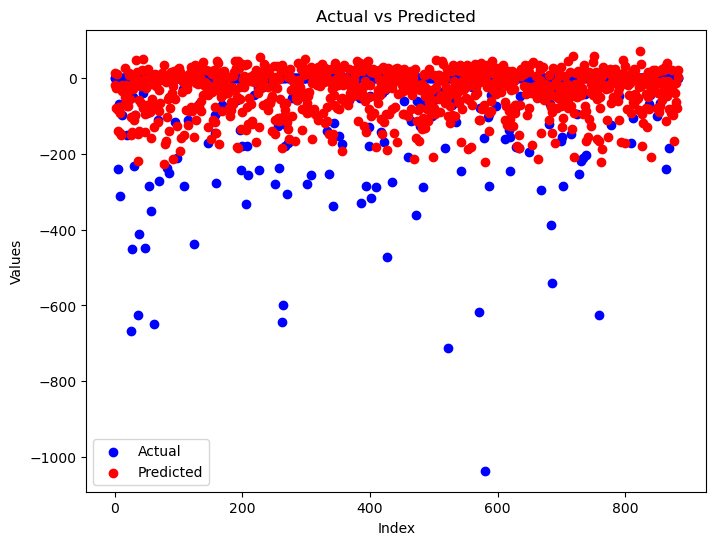

In [49]:
# Calculate residuals
residuals = y_test - y_pred

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create scatter plot for actual values
ax.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Create scatter plot for predicted values
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted')
ax.legend()

plt.show()
